# ObsID : 0945030131, SRCNUM : 7, Instru : EPN

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [2]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945030131_SRCNUM7_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.465e-03 +/- 1.365e-03 (53.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.131e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945030131_SRCNUM7_EPN_background_spectrum.fits
  Background Exposure Time: 1.131e+04 sec
 Using Response (RMF) File            ObsID0945030131_SRCNUM7_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945030131_SRCNUM7_EPN.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 856.5, 662.5, -0.5)

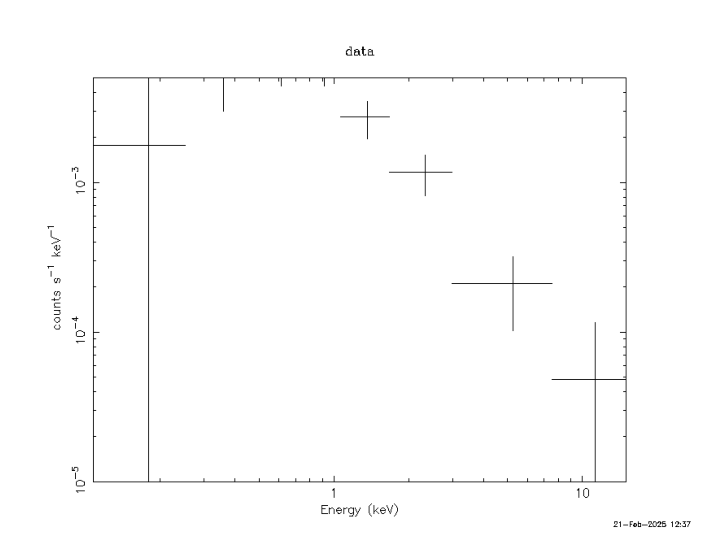

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.418191e+11     using 8 bins.

Tes

(-0.5, 859.5, 662.5, -0.5)

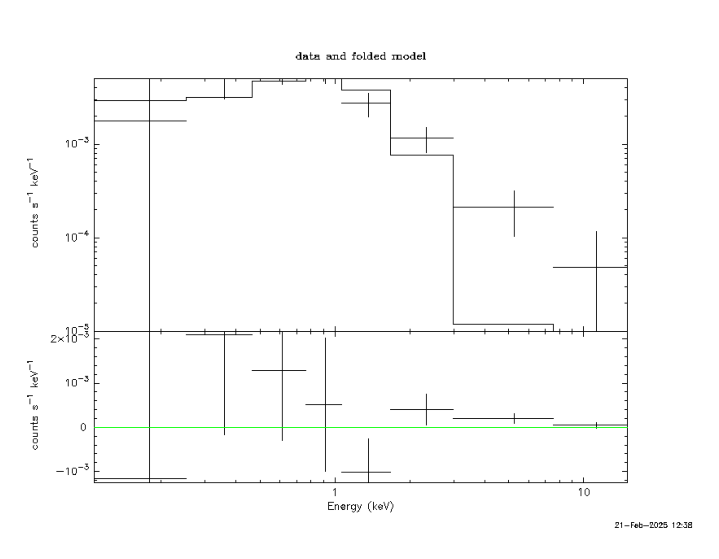

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.049833e+10     using 8 bins.

Test statistic : Chi-Squared              1.049833e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
27.6407      2.03259      -1      0.398053       6.17330   2.95740e-05
24.4451      103226       -2    0.00779950       21.3044   1.39606e-05
10.8809      341186       -3     0.0753747       6.58797   2.39543e-05
2.9

(-0.5, 860.5, 661.5, -0.5)

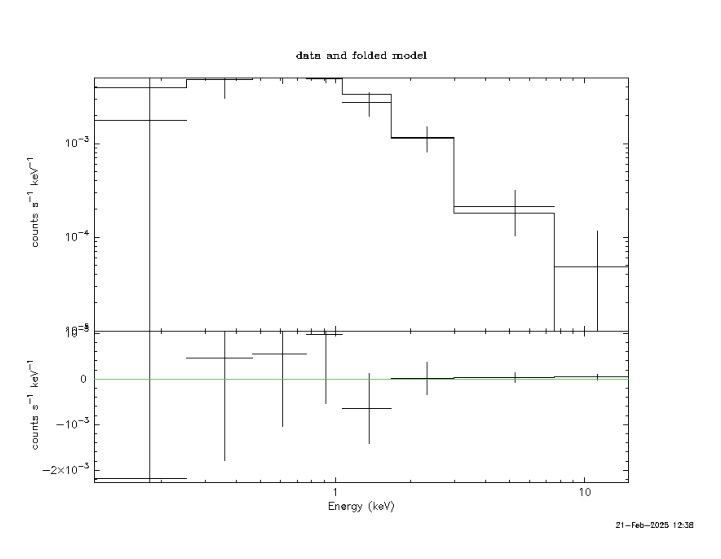

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.761047e+09     using 8 bins.

Test statistic : Chi-Squared              1.761047e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.8868      1.55594      -1       1.02326      0.804083   0.0

(-0.5, 860.5, 661.5, -0.5)

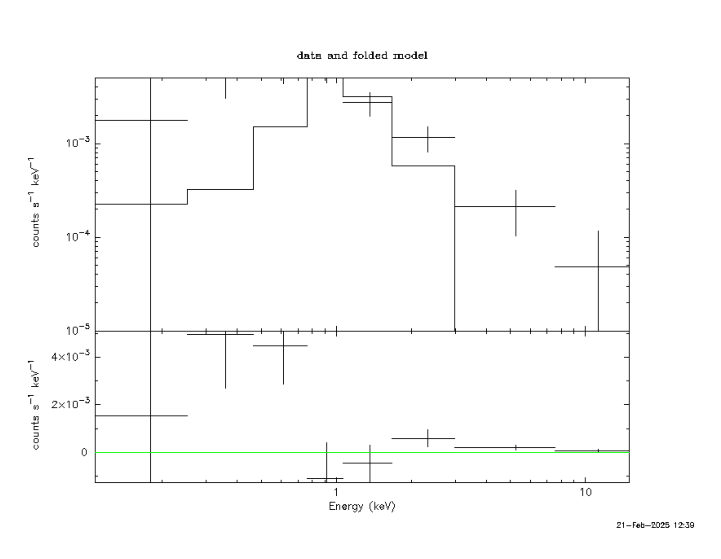

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.085070e+10     using 8 bins.

Test statistic : Chi-Squared              7.085070e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
35.7778      2.47414      -2     0.0199005      0.515107   4.75975e-06
15.7854      635014       -1    0.00364322       1.30827   1.11420e-05
2.68392      418660       -2     0.0607423       1.89100   2.40941e-05
1

(-0.5, 860.5, 661.5, -0.5)

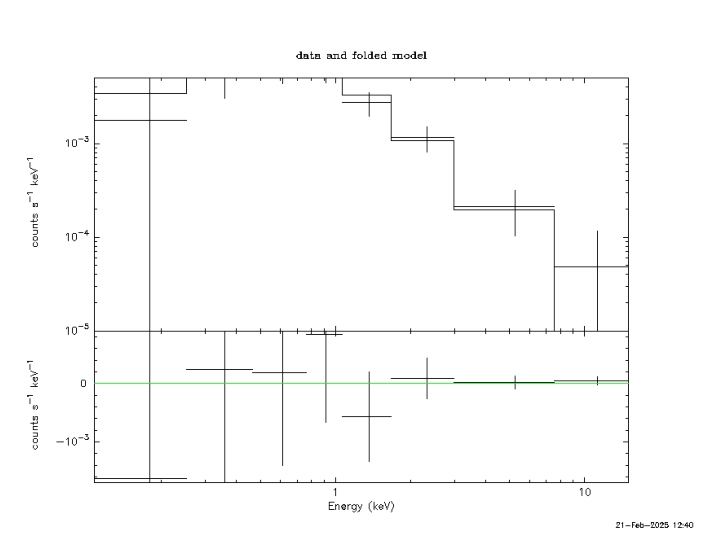

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 5.7778e-05 photons (1.6275e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
Flux = 1.6275e-13 # ergs/cm^2/s

### ESASky
There are two EPIC Stack pointers on two extremely close sources: one light green/blue and one blue.

**Green source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032932.2-283705
- IAU name : 4XMM J032932.3-283705
- RA : 03h 29m 32.247s
- DEC : -28° 37' 05.84"

**Blue source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032933.0-283717
- IAU name : 4XMM J032933.1-283720
- RA : 03h 29m 33.006s
- DEC : -28° 37' 17.85""

### Luminosité
No distance or parallax is available on ESASky.